In [2]:
import numpy as np
import scipy.stats as stats             # For distribution functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # For 3D graphs

plt.rcParams['axes.axisbelow'] = True   # Set axes and grid elements to be below the figure
# %matplotlib widget

#### Grometric Brownian Motion

![Geometric Brownian Motion](geometric_brownian_motion.png)

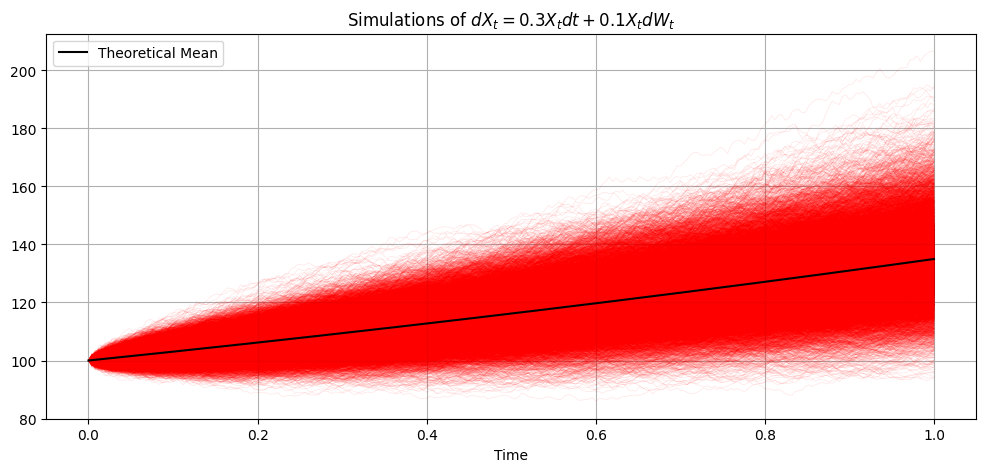

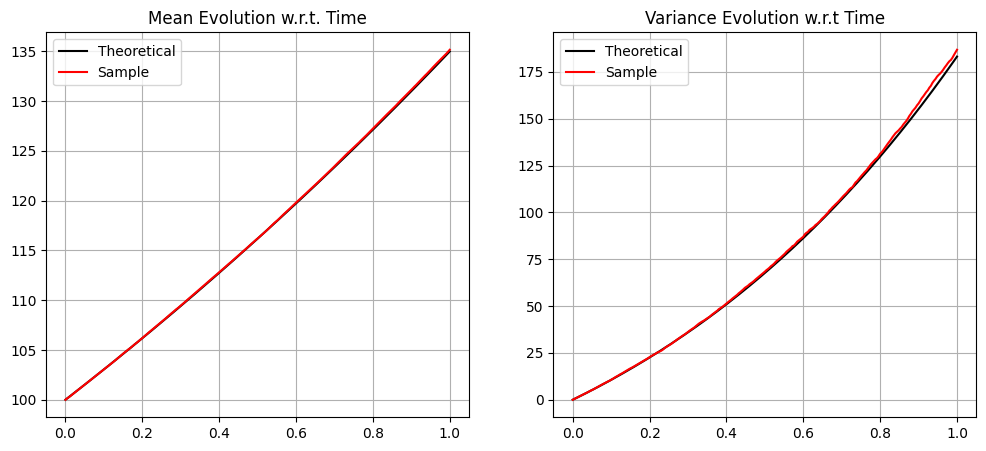

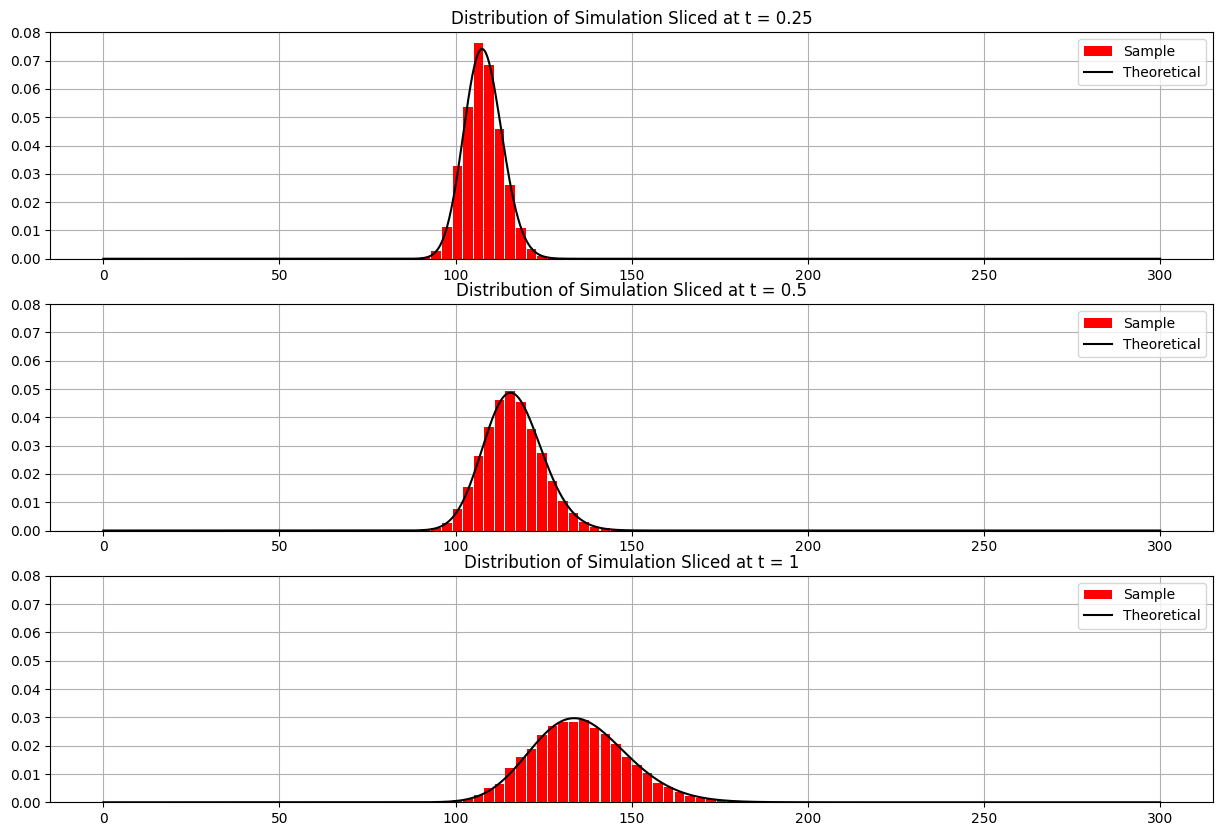

In [9]:
# GBM parameters
N_SIMS = 10000  # FIXME: number of simulations
N_STEPS = 250   # FIXME: number of steps (excluding t = 0)
MU = 0.3        # FIXME: drift
SIGMA = 0.1     # FIXME: volatility
X0 = 100        # FIXME: initial value
T = 1           # FIXME: time horizon

# Deriving information
dt = T / N_STEPS

# Starting simulation
# Z = rnorm(N_SIMS * N_STEPS).reshape((N_STEPS, N_SIMS))
Z = np.random.normal(size = (N_STEPS, N_SIMS))
X = np.exp((MU - SIGMA**2 / 2) * dt  + SIGMA * np.sqrt(dt) * Z)
X = np.cumprod(X, axis = 0)
X = np.vstack([np.ones(N_SIMS), X]) # Stack a row of ones on the top of the post-cumulated matrix
X *= X0

# Computing theoretical mean and variance

def mean_gbm(x0, t, mu):
    return x0 * np.exp(mu * t)

# Theoretical Variance of GBM
def var_gbm(x0, t, mu, sigma):
    return x0**2 * np.exp(2 * t * (mu - sigma**2 / 2) + 2 * sigma**2 * t) - mean_gbm(x0, t, mu)**2

t_steps = np.linspace(0, T, N_STEPS + 1) # Add 1 because we had stacked a row from previous steps
X_mean_exact = mean_gbm(X0, t_steps, MU)
X_var_exact = var_gbm(X0, t_steps, MU, SIGMA)
X_mean_sample = X.mean(axis = 1)
X_var_sample = X.var(axis = 1)

# PLOTS ====================================================================================================

# Plotting trajectories ---------------------------------------------------------------
plt.figure(figsize = (12, 5), clear = True)

plt.title(f"Simulations of $dX_t = {MU}X_tdt+{SIGMA}X_t dW_t$")
plt.plot(t_steps, X, color = "red", alpha = 0.1, lw = 0.5)
plt.plot(t_steps, X_mean_exact, color = "black", label = "Theoretical Mean")

plt.xlabel("Time")
plt.grid()
plt.legend()

plt.show()



# Plotting mean and variance convergence ----------------------------------------------
fig, ax = plt.subplots(1, 2, figsize = (12, 5), clear = True)

ax[0].set_title("Mean Evolution w.r.t. Time")
ax[0].plot(t_steps, X_mean_exact, color = "black", label = "Theoretical")
ax[0].plot(t_steps, X_mean_sample, color = "red", label = "Sample")

ax[0].grid()
ax[0].legend()

ax[1].set_title("Variance Evolution w.r.t Time")
ax[1].plot(t_steps, X_var_exact, color = "black", label = "Theoretical")
ax[1].plot(t_steps, X_var_sample, color = "red", label = "Sample")

ax[1].grid()
ax[1].legend()

plt.show()



# Histogram from GBM slices & Theoretical Log-normal Distribution ----------------------

# Setting plotting parameters
X_LIM = (0, 300)                          # FIXME: Range for plotting histograms
Y_LIM = (0, 0.08)                         # FIXME: Range for plotting y-axis
x = np.linspace(X_LIM[0], X_LIM[1], 1000) # Range for plotting theoretical distribution

# Slicing
slice0 = X[N_STEPS // 4]  # t = 0.25
slice1 = X[N_STEPS // 2]  # t = 0.5
slice2 = X[N_STEPS]       # t = 1

# Plotting
fig, ax = plt.subplots(3, 1, figsize = (15, 10), clear = True)

# Slice at t = 0.25
y = stats.lognorm.pdf(x, s = SIGMA * np.sqrt(0.25), scale = mean_gbm(X0, 0.25, MU))

ax[0].set_title("Distribution of Simulation Sliced at t = 0.25")
ax[0].hist(slice0, range = X_LIM, bins = 100, density = True, color = "red", rwidth = 0.9, label = "Sample")
ax[0].plot(x, y, color = "black", label = "Theoretical")

ax[0].set_ylim(Y_LIM[0], Y_LIM[1])
ax[0].grid()
ax[0].legend()

# Slice at t = 0.5
y = stats.lognorm.pdf(x, s = SIGMA * np.sqrt(0.5), scale = mean_gbm(X0, 0.5, MU))

ax[1].set_title("Distribution of Simulation Sliced at t = 0.5")
ax[1].hist(slice1, range = X_LIM, bins = 100, density = True, color = "red", rwidth = 0.9, label = "Sample")
ax[1].plot(x, y, color = "black", label = "Theoretical")

ax[1].set_ylim(Y_LIM[0], Y_LIM[1])
ax[1].grid()
ax[1].legend()

# Slice at t = 1
y = stats.lognorm.pdf(x, s = SIGMA * np.sqrt(1), scale = mean_gbm(X0, 1, MU))

ax[2].set_title("Distribution of Simulation Sliced at t = 1")
ax[2].hist(slice2, range = X_LIM, bins = 100, density = True, color = "red", rwidth = 0.9, label = "Sample")
ax[2].plot(x, y, color = "black", label = "Theoretical")

ax[2].set_ylim(Y_LIM[0], Y_LIM[1])
ax[2].grid()
ax[2].legend()

plt.show()

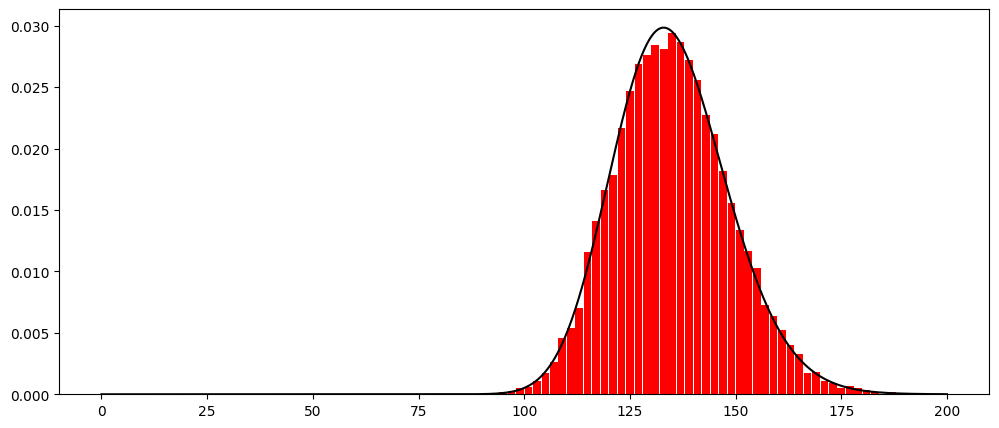

In [15]:
plt.figure(figsize = (12, 5), clear = True)
t = 1
x_steps = np.linspace(0, 200, 1000)
y = stats.lognorm.pdf(x_steps, scale = X0 * np.exp(MU - 0.5 * SIGMA**2) * t, s = SIGMA * np.sqrt(t))


plt.hist(X[int(t * N_STEPS)], range = (0, 200), bins = 100, density = True, color = "red", rwidth = 0.9, label = "Sample")
plt.plot(x_steps, y, color = "black", label = "Theoretical")


plt.show()

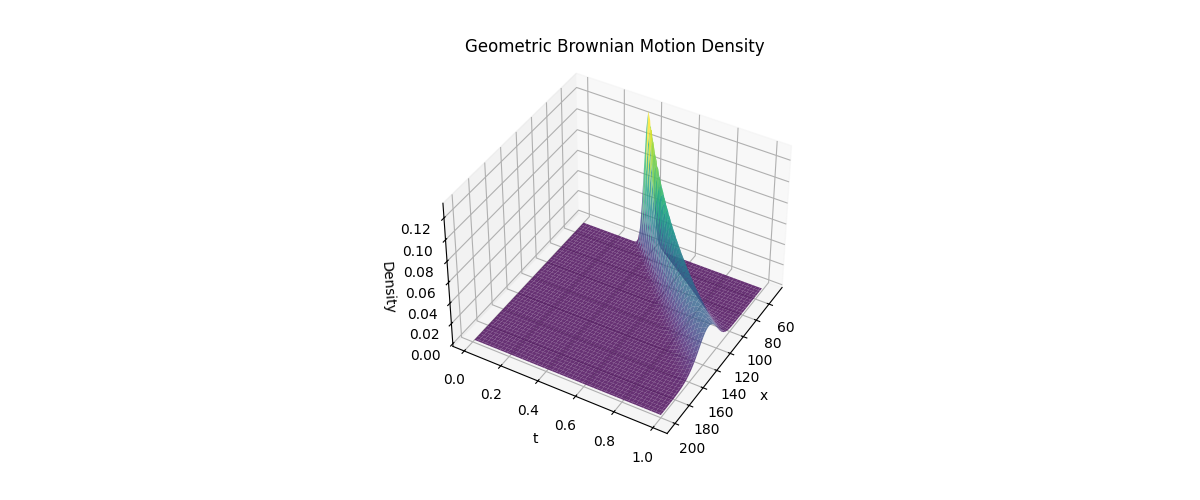

In [30]:
# 3D Plot --------------------------------------------------------------------
%matplotlib widget

def gbm_density(x, t, x0, mu, sigma):
    return stats.lognorm.pdf(x, s = sigma * np.sqrt(t), scale = mean_gbm(x0, t, mu))

# Create meshgrid
x_grid = np.linspace(50, 200, 100)
t_grid = np.linspace(0.01, 1, 100) # Avoid t = 0 for numerical stability
XV, TV = np.meshgrid(x_grid, t_grid)
ZV = stats.lognorm.pdf(XV, s = SIGMA * np.sqrt(TV), scale = X0 * np.exp(MU - 0.5 * SIGMA**2) * TV)

# y = stats.lognorm.pdf(x, s = SIGMA * np.sqrt(0.25), scale = mean_gbm(X0, 0.25, MU))

# Plot
fig = plt.figure(figsize = (12, 5), clear = True)
ax = fig.add_subplot(111, projection = '3d')

ax.set_title('Geometric Brownian Motion Density')
ax.plot_surface(XV, TV, ZV, cmap = plt.cm.viridis, alpha = 0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('Density')

# Angle
ax.view_init(40, 30)
plt.show()